<a href="https://www.analytiksinc.com">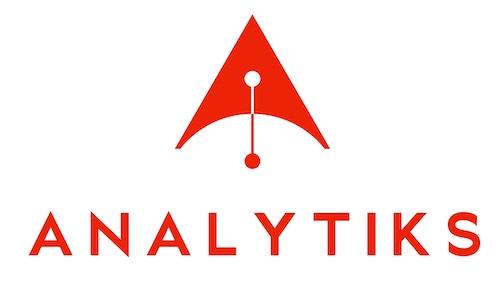</a>
<p style="text-align: right;"> © 2020. Analytiks Inc. </p>

## Linear Regression Homework

### Wine Quality

Dataset: winequality-red.csv

#### The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).




<p style="text-align: left;">
Input variables (based on physicochemical tests): <br>
1 - fixed acidity <br>
2 - volatile acidity <br>
3 - citric acid <br>
4 - residual sugar <br>
5 - chlorides <br>
6 - free sulfur dioxide <br>
7 - total sulfur dioxide <br>
8 - density <br>
9 - pH <br>
10 - sulphates <br>
11 - alcohol <br>

Output variable (based on sensory data): <br>
12 - quality (score between 0 and 10) 

</p>

## Import Libraries

### Standard Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Additional libraries

In [2]:
#Train-Test Split
from sklearn.model_selection import train_test_split

#Linear Regression Algorithm from sklearn (Linear, Lasso, and Ridge Regression)
from sklearn.linear_model import LinearRegression, Ridge, Lasso

#Metrics to measure model performance (r2, mae, and mse)
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

### <i> OPTIONAL </i> 
Create a function to print the metrics

## Load and Explore the dataset

In [3]:
df = pd.read_csv('../Datasets/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Check Correlation

In [7]:
corrmat = df.corr()
corrmat

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


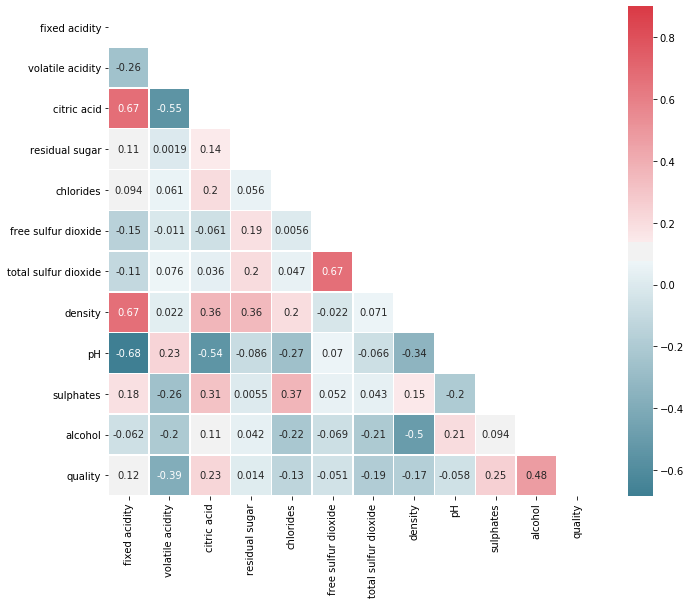

In [8]:
#Visualize Correlation

# Generate a mask for the upper triangle
mask = np.zeros_like(corrmat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrmat, mask=mask, cmap=cmap, vmax=.9, square=True, linewidths=.5, ax=ax, annot=True)

## Build the Model

In [9]:
df_new = df[['alcohol','sulphates','citric acid', 'quality']]
df_new.head()

,alcohol,sulphates,citric acid,quality
0,9.4,0.56,0.00,5
1,9.8,0.68,0.00,5
2,9.8,0.65,0.04,5
3,9.8,0.58,0.56,6
4,9.4,0.56,0.00,5


In [10]:
columns = list(df.columns)

columns.pop(-1)

columns

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [11]:
#Split into train and test set (test_size=0.30, and random_state=30)

df_train, df_test = train_test_split(df, test_size=0.25, random_state=30)

x_train = df_train[columns]
y_train = df_train[['quality']]

x_test = df_test[columns]
y_test = df_test[['quality']]

### Linear Regression

In [12]:
#Instantiate the Linear Regression Algorithm
linreg = LinearRegression()

#Train the Model
linreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
print(linreg.coef_, linreg.intercept_)

[[-2.86433342e-03 -9.40321401e-01  1.79166957e-01  1.05792292e-02
  -1.79897343e+00  5.23929676e-03 -3.91147361e-03 -6.53529287e+00
  -4.66013545e-01  8.80643725e-01  2.77000097e-01]] [10.94110033]


In [14]:
#Predict on the test set
linreg_pred = linreg.predict(x_test)

In [15]:
print('R_2 score: {}'.format(r2_score(y_test,linreg_pred)))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test,linreg_pred))))

R_2 score: 0.35873119978626655
RMSE: 0.6448462960803869


#### Validate Linear Regression Model

In [16]:
linreg_pred_df = pd.DataFrame(linreg_pred.reshape(-1,1), index=x_test.index, columns=['quality_pred'])

In [17]:
samp = x_test.join(y_test).join(linreg_pred_df)
samp

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_pred
1147,10.0,0.410,0.45,6.20,0.071,6.0,14.0,0.99702,3.21,0.49,11.8,7,6.210485
659,7.1,0.840,0.02,4.40,0.096,5.0,13.0,0.99700,3.41,0.57,11.0,4,5.427846
871,6.9,0.560,0.03,1.50,0.086,36.0,46.0,0.99522,3.53,0.57,10.6,5,5.559061
1333,9.1,0.775,0.22,2.20,0.079,12.0,48.0,0.99760,3.18,0.51,9.6,5,5.088777
1411,6.4,0.470,0.40,2.40,0.071,8.0,19.0,0.99630,3.56,0.73,10.6,6,5.826694
...,...,...,...,...,...,...,...,...,...,...,...,...,...
721,8.9,0.480,0.24,2.85,0.094,35.0,106.0,0.99820,3.10,0.53,9.2,5,5.184031
490,9.3,0.775,0.27,2.80,0.078,24.0,56.0,0.99840,3.31,0.67,10.6,6,5.488982
575,12.3,0.270,0.49,3.10,0.079,28.0,46.0,0.99930,3.20,0.80,10.2,6,6.105178
1051,8.5,0.460,0.59,1.40,0.414,16.0,45.0,0.99702,3.03,1.34,9.2,5,5.568387


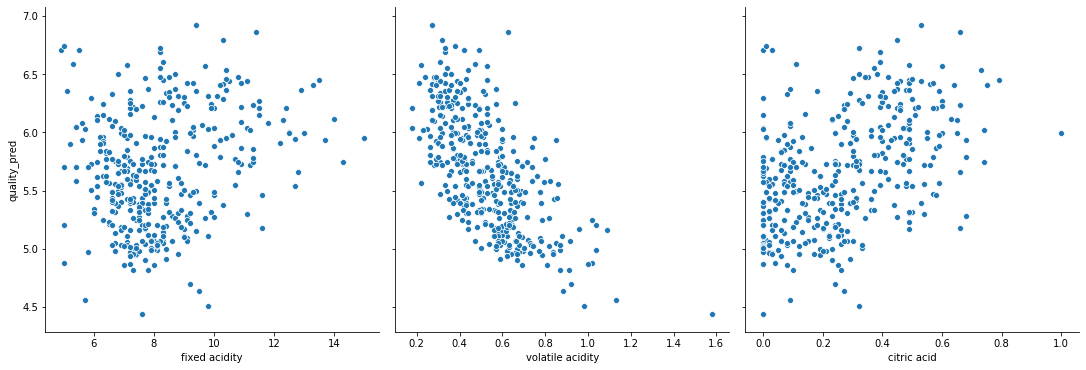

In [18]:
sns.pairplot(samp, x_vars=columns[:3], y_vars='quality_pred', height=5)
plt.show()

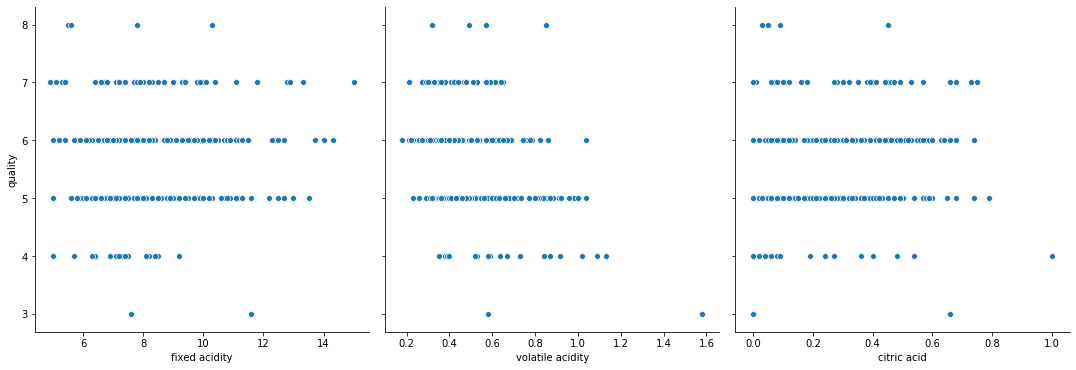

In [19]:
sns.pairplot(samp, x_vars=columns[:3], y_vars='quality', height=5)
plt.show()

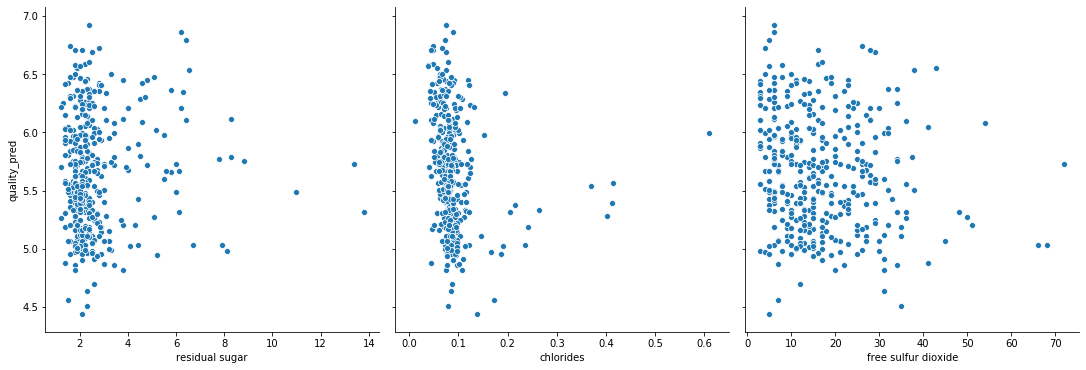

In [20]:
sns.pairplot(samp, x_vars=columns[3:6], y_vars='quality_pred', height=5)
plt.show()

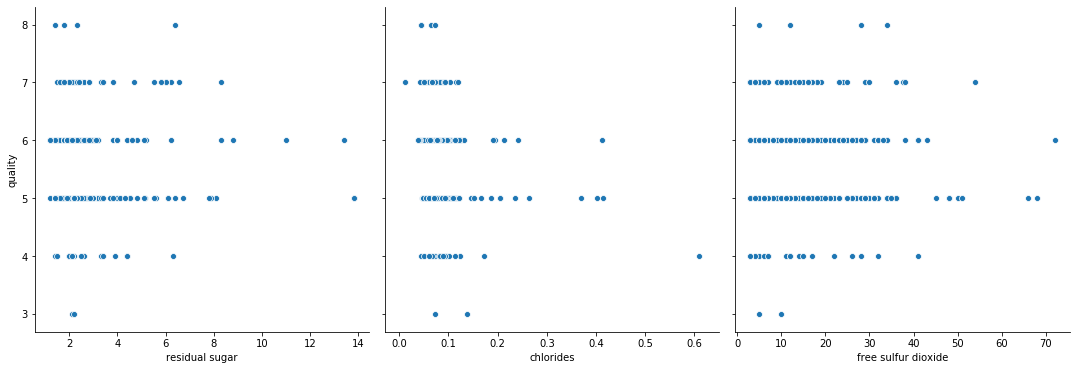

In [21]:
sns.pairplot(samp, x_vars=columns[3:6], y_vars='quality', height=5)
plt.show()

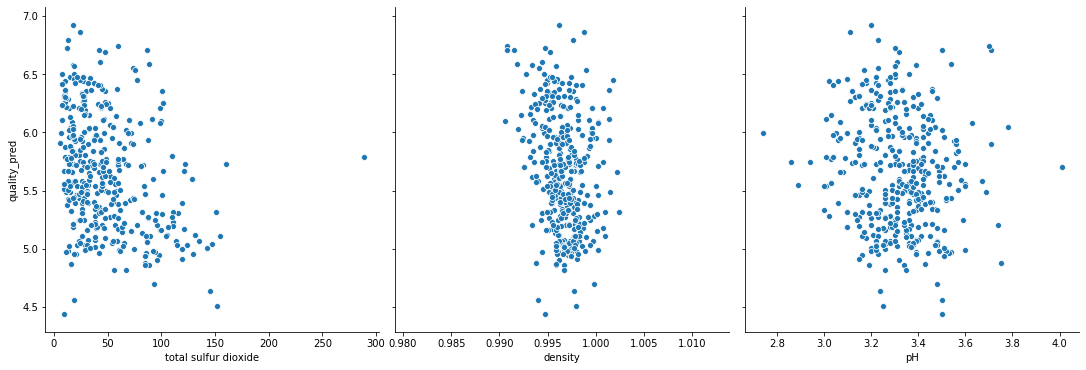

In [22]:
sns.pairplot(samp, x_vars=columns[6:9], y_vars='quality_pred', height=5)
plt.show()

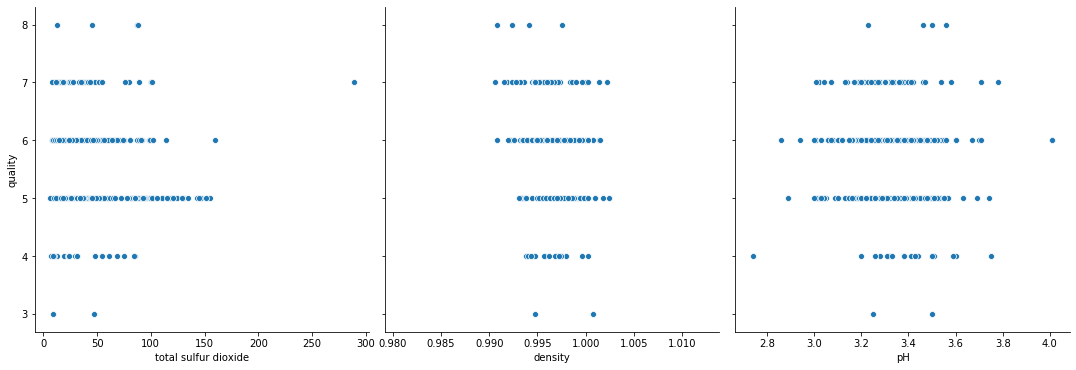

In [23]:
sns.pairplot(samp, x_vars=columns[6:9], y_vars='quality', height=5)
plt.show()

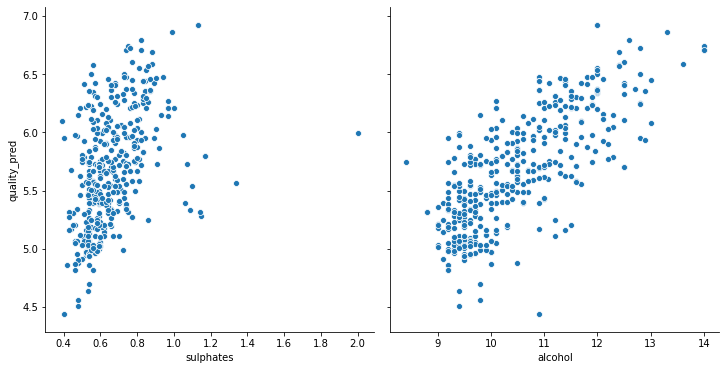

In [24]:
sns.pairplot(samp, x_vars=columns[9:], y_vars='quality_pred', height=5)
plt.show()

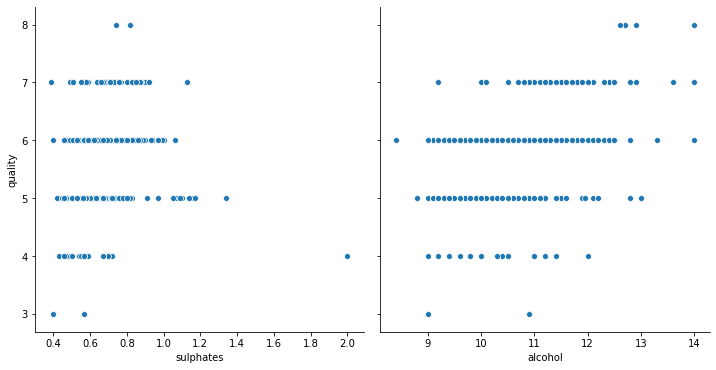

In [25]:
sns.pairplot(samp, x_vars=columns[9:], y_vars='quality', height=5)
plt.show()

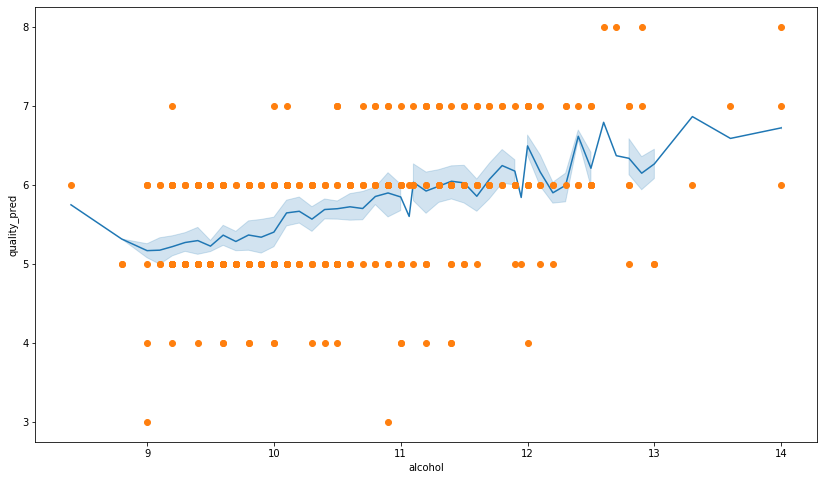

In [26]:
x = samp['alcohol']

plt.figure(figsize=(14,8))
sns.lineplot(x, samp['quality_pred'])
plt.plot(x, samp['quality'], 'o')
plt.show()

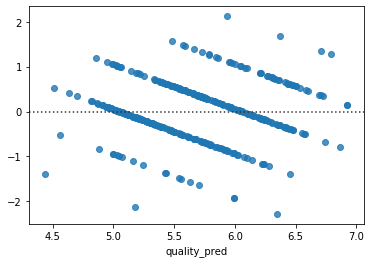

In [27]:
col = list(samp.columns)
i=12

sns.residplot(samp[col[i]], samp['quality']-samp['quality_pred'])
# pd.concat([samp['quality']-samp['quality_pred'],samp['quality_pred']], axis=1)

### Regression Model with Lasso Regularization

In [28]:
x_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1178,5.6,0.915,0.00,2.1,0.041,17.0,78.0,0.99346,3.68,0.73,11.4
1189,8.8,0.955,0.05,1.8,0.075,5.0,19.0,0.99616,3.30,0.44,9.6
161,7.6,0.680,0.02,1.3,0.072,9.0,20.0,0.99650,3.17,1.08,9.2
109,8.1,0.785,0.52,2.0,0.122,37.0,153.0,0.99690,3.21,0.69,9.3
961,7.1,0.560,0.14,1.6,0.078,7.0,18.0,0.99592,3.27,0.62,9.3
...,...,...,...,...,...,...,...,...,...,...,...
919,8.4,0.620,0.12,1.8,0.072,38.0,46.0,0.99504,3.38,0.89,11.8
1164,9.0,0.785,0.24,1.7,0.078,10.0,21.0,0.99692,3.29,0.67,10.0
500,7.8,0.520,0.25,1.9,0.081,14.0,38.0,0.99840,3.43,0.65,9.0
941,9.9,0.270,0.49,5.0,0.082,9.0,17.0,0.99484,3.19,0.52,12.5


In [29]:
#Instantiate the Linear Regression Algorithm
lassoreg = Lasso(alpha=0.1)

#Train the Model
lassoreg.fit(x_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [30]:
print(lassoreg.coef_, lassoreg.intercept_)

[ 0.03234848 -0.          0.          0.         -0.          0.00615557
 -0.00384574 -0.         -0.          0.          0.25364218] [2.81740124]


In [31]:
#Predict on the test set
lassoreg_pred = lassoreg.predict(x_test)

In [32]:
print('R_2 score: {}'.format(r2_score(y_test,lassoreg_pred)))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test,lassoreg_pred))))

R_2 score: 0.2419610868245925
RMSE: 0.7011031275820879


#### Validate Model with Lasso Regularization

In [33]:
lassoreg_pred_df = pd.DataFrame(lassoreg_pred.reshape(-1,1), index=x_test.index, columns=['quality_pred'])

In [34]:
samp = x_test.join(y_test).join(lassoreg_pred_df)
samp

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_pred
1147,10.0,0.410,0.45,6.20,0.071,6.0,14.0,0.99702,3.21,0.49,11.8,7,6.116957
659,7.1,0.840,0.02,4.40,0.096,5.0,13.0,0.99700,3.41,0.57,11.0,4,5.817923
871,6.9,0.560,0.03,1.50,0.086,36.0,46.0,0.99522,3.53,0.57,10.6,5,5.773909
1333,9.1,0.775,0.22,2.20,0.079,12.0,48.0,0.99760,3.18,0.51,9.6,5,5.436009
1411,6.4,0.470,0.40,2.40,0.071,8.0,19.0,0.99630,3.56,0.73,10.6,6,5.689214
...,...,...,...,...,...,...,...,...,...,...,...,...,...
721,8.9,0.480,0.24,2.85,0.094,35.0,106.0,0.99820,3.10,0.53,9.2,5,5.246607
490,9.3,0.775,0.27,2.80,0.078,24.0,56.0,0.99840,3.31,0.67,10.6,6,5.739222
575,12.3,0.270,0.49,3.10,0.079,28.0,46.0,0.99930,3.20,0.80,10.2,6,5.797890
1051,8.5,0.460,0.59,1.40,0.414,16.0,45.0,0.99702,3.03,1.34,9.2,5,5.351302


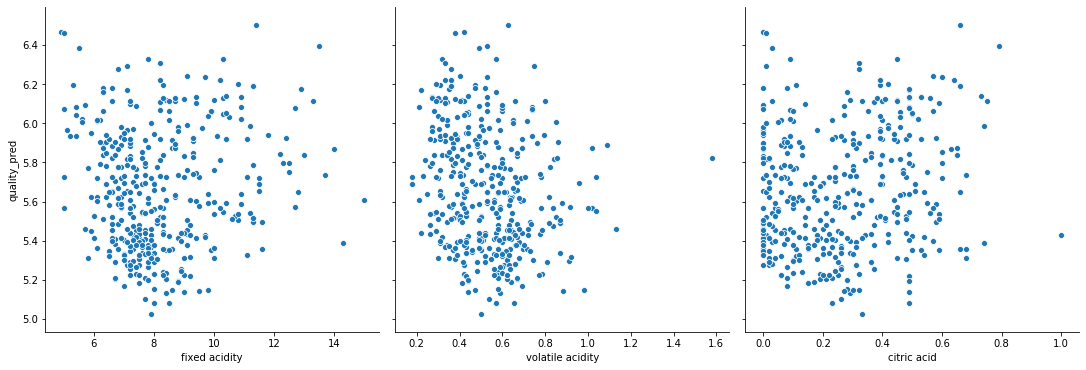

In [35]:
sns.pairplot(samp, x_vars=columns[:3], y_vars='quality_pred', height=5)
plt.show()

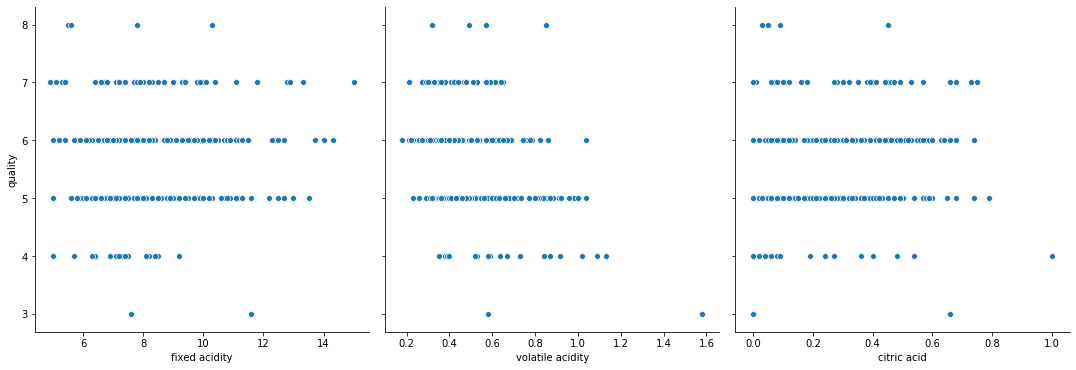

In [36]:
sns.pairplot(samp, x_vars=columns[:3], y_vars='quality', height=5)
plt.show()

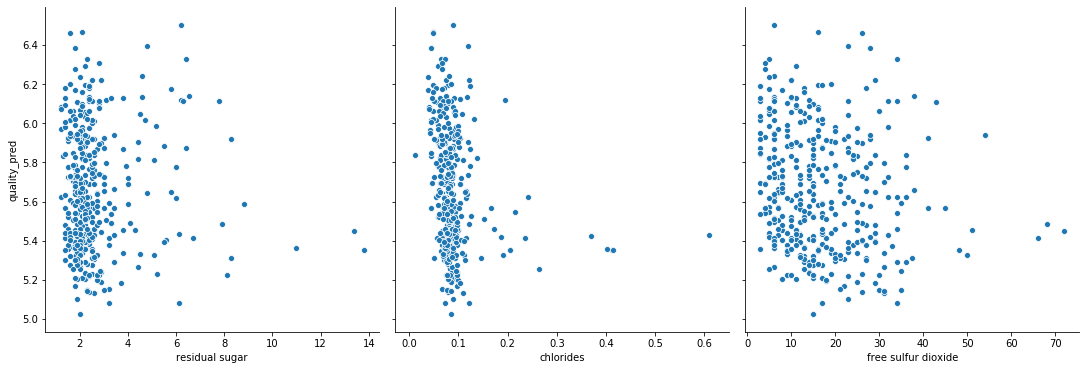

In [37]:
sns.pairplot(samp, x_vars=columns[3:6], y_vars='quality_pred', height=5)
plt.show()

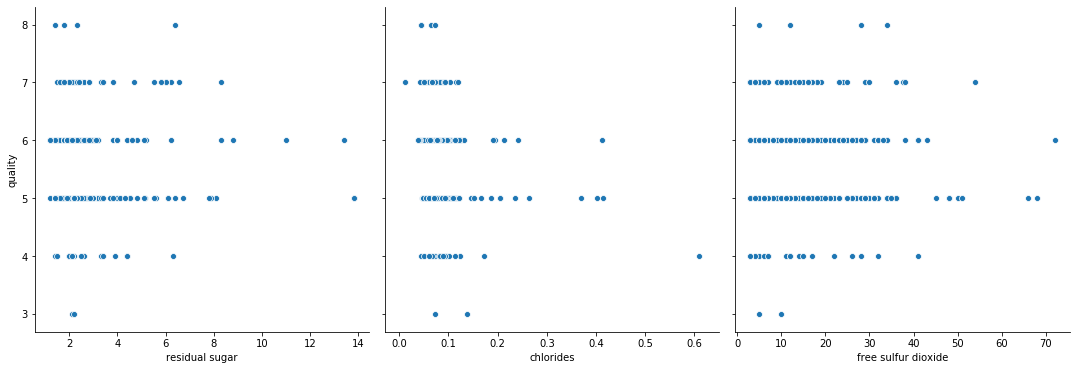

In [38]:
sns.pairplot(samp, x_vars=columns[3:6], y_vars='quality', height=5)
plt.show()

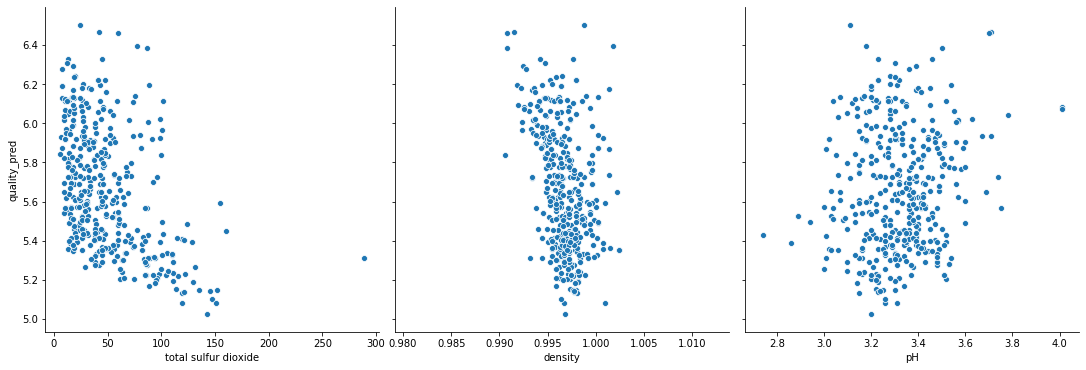

In [39]:
sns.pairplot(samp, x_vars=columns[6:9], y_vars='quality_pred', height=5)
plt.show()

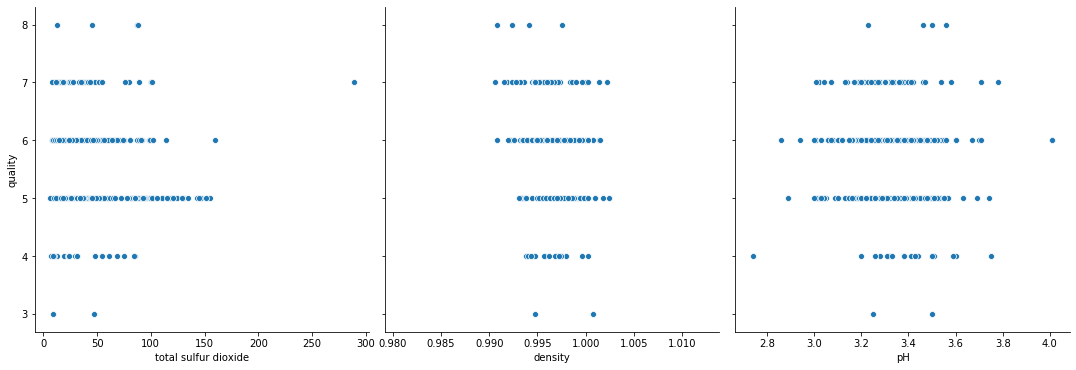

In [40]:
sns.pairplot(samp, x_vars=columns[6:9], y_vars='quality', height=5)
plt.show()

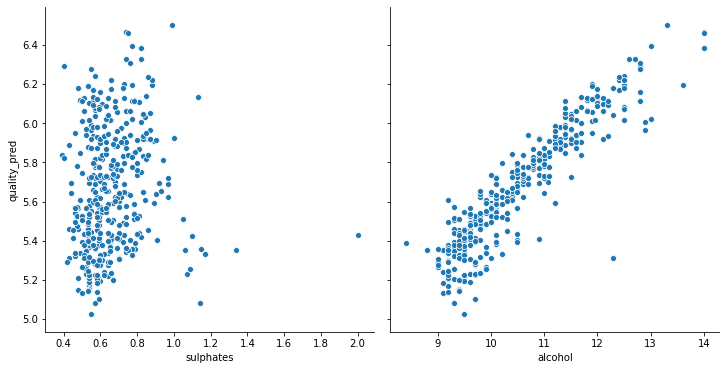

In [41]:
sns.pairplot(samp, x_vars=columns[9:], y_vars='quality_pred', height=5)
plt.show()

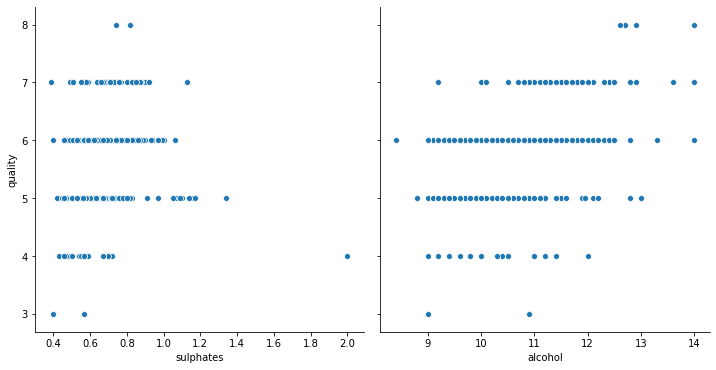

In [42]:
sns.pairplot(samp, x_vars=columns[9:], y_vars='quality', height=5)
plt.show()

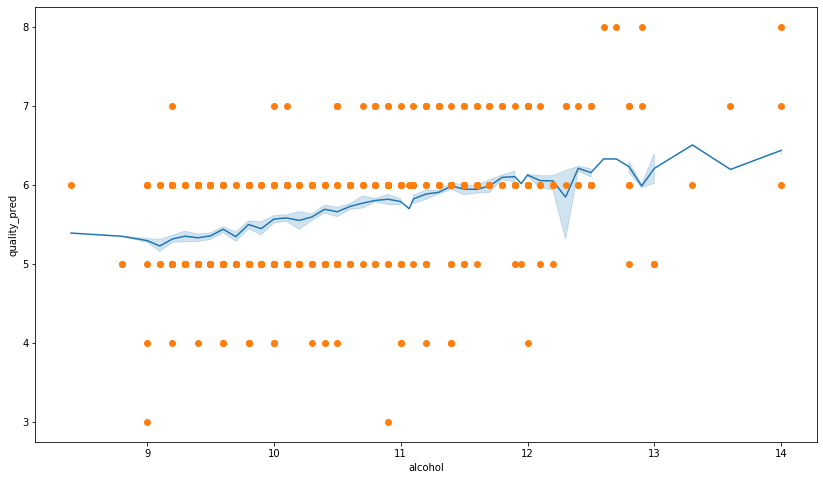

In [43]:
x = samp['alcohol']

plt.figure(figsize=(14,8))
sns.lineplot(x, samp['quality_pred'])
plt.plot(x, samp['quality'], 'o')
plt.show()

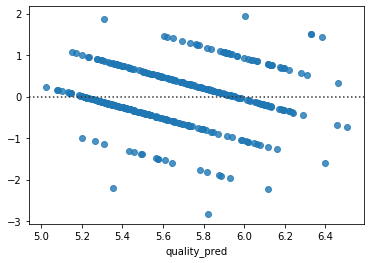

In [44]:
col = list(samp.columns)
i=12

sns.residplot(samp[col[i]], samp['quality']-samp['quality_pred'])
# pd.concat([samp['quality']-samp['quality_pred'],samp['quality_pred']], axis=1)

#### Try with Different values of alpha

### Regression Model with Ridge Regularization

In [45]:
#Instantiate the Linear Regression Algorithm
ridgereg = Ridge(alpha=10)

#Train the Model
ridgereg.fit(x_train, y_train)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [46]:
print(ridgereg.coef_, ridgereg.intercept_)

[[ 0.01202641 -0.79573393  0.18350305  0.00133861 -0.25382706  0.00594594
  -0.00372993 -0.00220362 -0.25026918  0.58408848  0.30188097]] [3.31849937]


In [47]:
#Predict on the test set
ridgereg_pred = ridgereg.predict(x_test)

In [48]:
print('R_2 score: {}'.format(r2_score(y_test,ridgereg_pred)))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test,ridgereg_pred))))

R_2 score: 0.33913371282695204
RMSE: 0.654625552131192


#### Validate Model with Ridge Regularization

In [49]:
ridgereg_pred_df = pd.DataFrame(ridgereg_pred.reshape(-1,1), index=x_test.index, columns=['quality_pred'])

In [50]:
samp = x_test.join(y_test).join(ridgereg_pred_df)
samp

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_pred
1147,10.0,0.410,0.45,6.20,0.071,6.0,14.0,0.99702,3.21,0.49,11.8,7,6.211661
659,7.1,0.840,0.02,4.40,0.096,5.0,13.0,0.99700,3.41,0.57,11.0,4,5.499910
871,6.9,0.560,0.03,1.50,0.086,36.0,46.0,0.99522,3.53,0.57,10.6,5,5.631257
1333,9.1,0.775,0.22,2.20,0.079,12.0,48.0,0.99760,3.18,0.51,9.6,5,5.124712
1411,6.4,0.470,0.40,2.40,0.071,8.0,19.0,0.99630,3.56,0.73,10.6,6,5.789933
...,...,...,...,...,...,...,...,...,...,...,...,...,...
721,8.9,0.480,0.24,2.85,0.094,35.0,106.0,0.99820,3.10,0.53,9.2,5,5.189151
490,9.3,0.775,0.27,2.80,0.078,24.0,56.0,0.99840,3.31,0.67,10.6,6,5.541659
575,12.3,0.270,0.49,3.10,0.079,28.0,46.0,0.99930,3.20,0.80,10.2,6,6.063892
1051,8.5,0.460,0.59,1.40,0.414,16.0,45.0,0.99702,3.03,1.34,9.2,5,5.786502


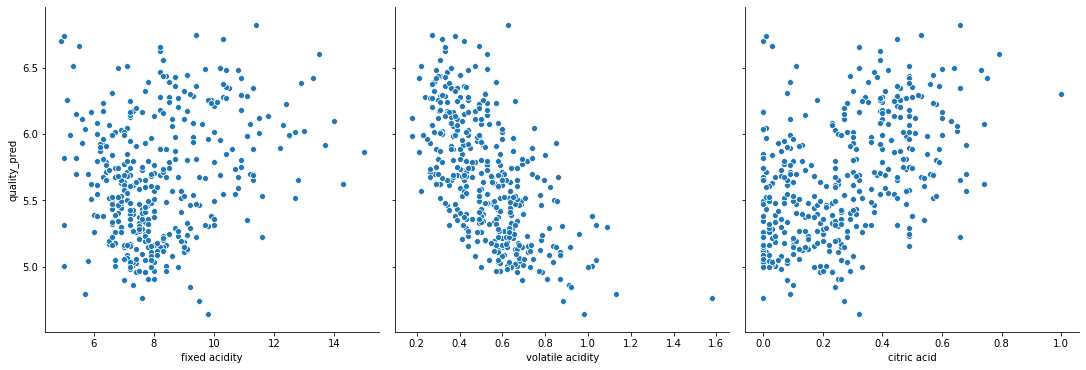

In [51]:
sns.pairplot(samp, x_vars=columns[:3], y_vars='quality_pred', height=5)
plt.show()

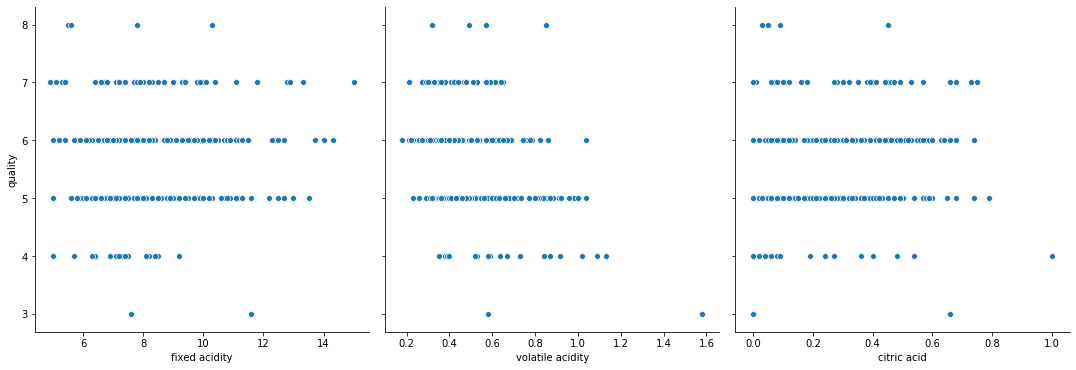

In [52]:
sns.pairplot(samp, x_vars=columns[:3], y_vars='quality', height=5)
plt.show()

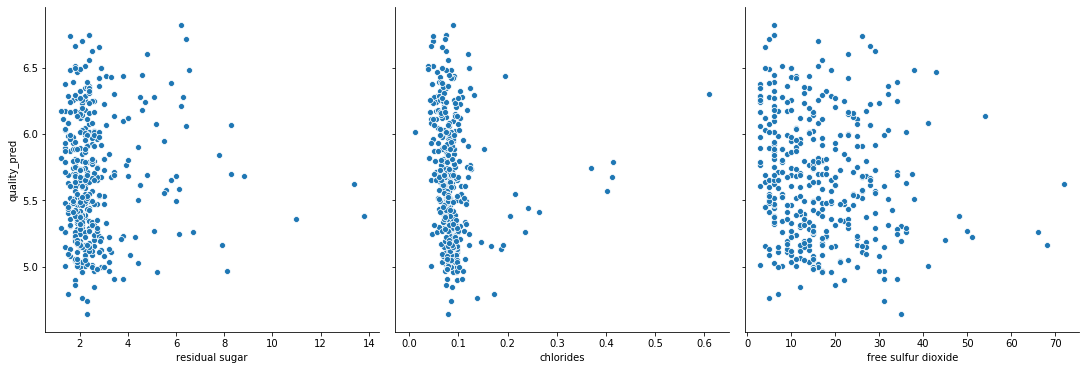

In [53]:
sns.pairplot(samp, x_vars=columns[3:6], y_vars='quality_pred', height=5)
plt.show()

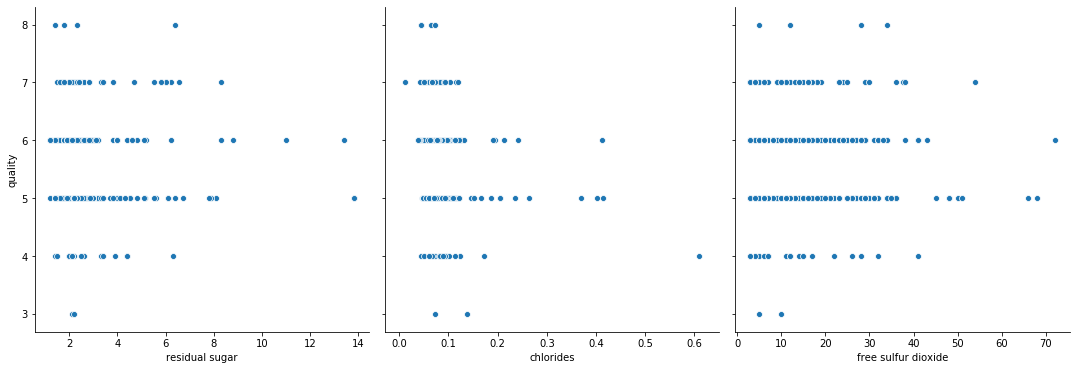

In [54]:
sns.pairplot(samp, x_vars=columns[3:6], y_vars='quality', height=5)
plt.show()

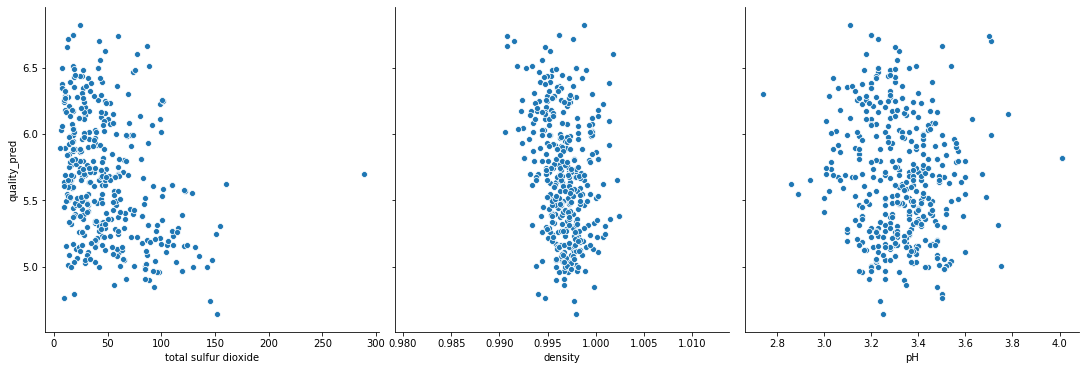

In [55]:
sns.pairplot(samp, x_vars=columns[6:9], y_vars='quality_pred', height=5)
plt.show()

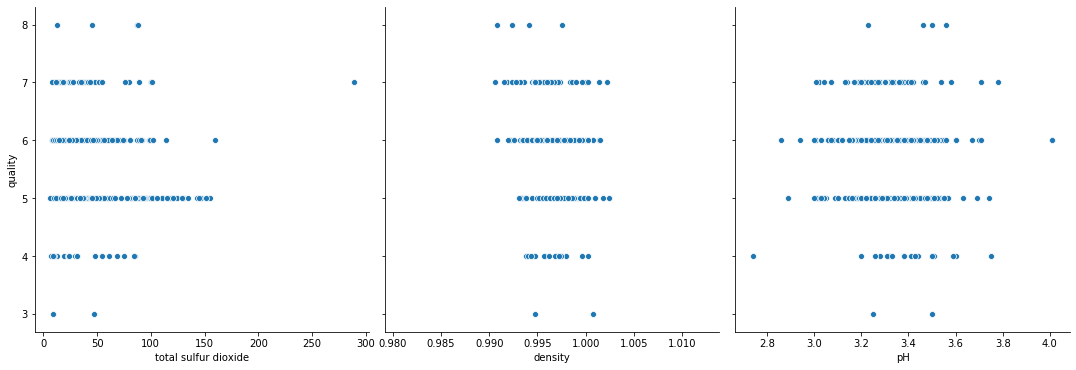

In [56]:
sns.pairplot(samp, x_vars=columns[6:9], y_vars='quality', height=5)
plt.show()

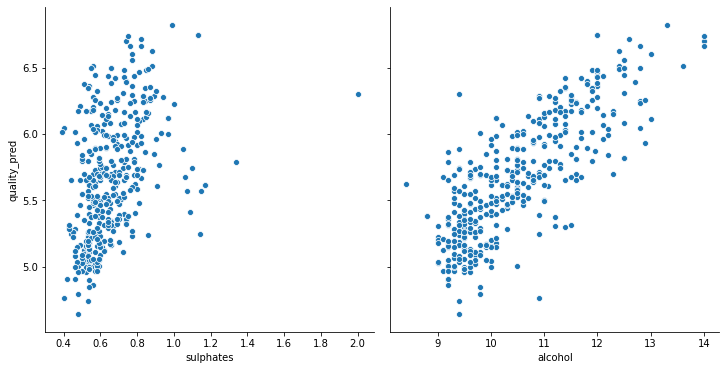

In [57]:
sns.pairplot(samp, x_vars=columns[9:], y_vars='quality_pred', height=5)
plt.show()

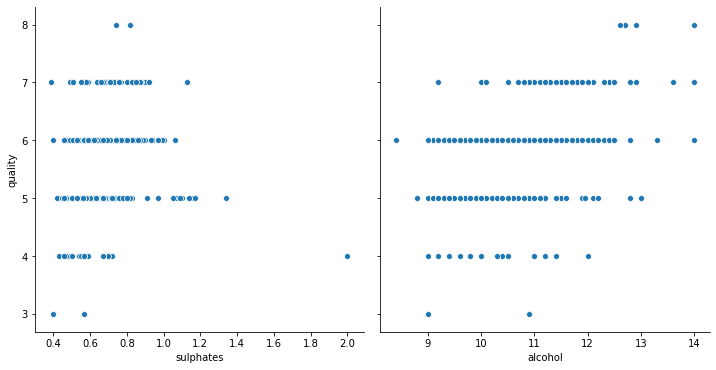

In [58]:
sns.pairplot(samp, x_vars=columns[9:], y_vars='quality', height=5)
plt.show()

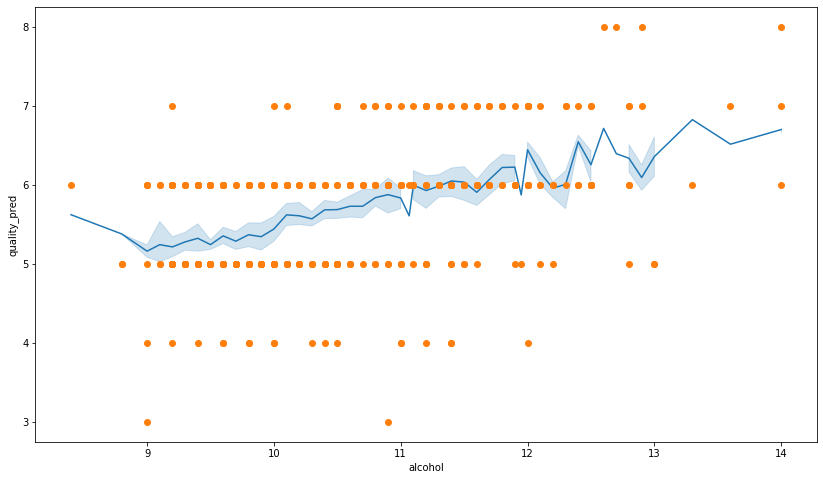

In [59]:
x = samp['alcohol']

plt.figure(figsize=(14,8))
sns.lineplot(x, samp['quality_pred'])
plt.plot(x, samp['quality'], 'o')
plt.show()

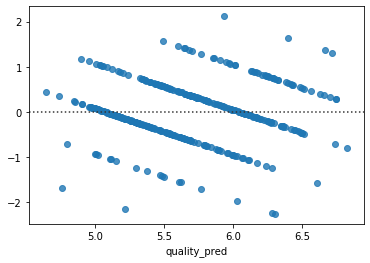

In [60]:
col = list(samp.columns)
i=12

sns.residplot(samp[col[i]], samp['quality']-samp['quality_pred'])
# pd.concat([samp['quality']-samp['quality_pred'],samp['quality_pred']], axis=1)

#### Try with different values of alpha

## *How else to improve on this model?*

### Check Log relationship

In [61]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [62]:
x = list(df.columns)[:-1]
y = list(df.columns)[-1]

In [63]:
## log x and y
# df_log = np.log(df)

## log y only
# df_log_y = np.log(df[y])
# df_log = pd.concat([df[x], df_log_y], axis=1)
# df_log

## Log predictors only
df_log_x = np.log(df[x])
df_log = pd.concat([df_log_x, df[y]], axis=1)
df_log

C:\Users\Nico\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,2.001480,-0.356675,-inf,0.641854,-2.577022,2.397895,3.526361,-0.002202,1.255616,-0.579818,2.240710,5
1,2.054124,-0.127833,-inf,0.955511,-2.322788,3.218876,4.204693,-0.003205,1.163151,-0.385662,2.282382,5
2,2.054124,-0.274437,-3.218876,0.832909,-2.385967,2.708050,3.988984,-0.003005,1.181727,-0.430783,2.282382,5
3,2.415914,-1.272966,-0.579818,0.641854,-2.590267,2.833213,4.094345,-0.002002,1.150572,-0.544727,2.282382,6
4,2.001480,-0.356675,-inf,0.641854,-2.577022,2.397895,3.526361,-0.002202,1.255616,-0.579818,2.240710,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,1.824549,-0.510826,-2.525729,0.693147,-2.407946,3.465736,3.784190,-0.005113,1.238374,-0.544727,2.351375,5
1595,1.774952,-0.597837,-2.302585,0.788457,-2.780621,3.663562,3.931826,-0.004892,1.258461,-0.274437,2.415914,6
1596,1.840550,-0.673345,-2.040221,0.832909,-2.577022,3.367296,3.688879,-0.004269,1.229641,-0.287682,2.397895,6
1597,1.774952,-0.438505,-2.120264,0.693147,-2.590267,3.465736,3.784190,-0.004540,1.272566,-0.342490,2.322388,5


In [64]:
import math

In [65]:
for i in range(len(df_log.columns)):
    print(df_log.columns[i], list(filter(lambda x : x==-math.inf, df_log[list(df_log.columns)[i]])))

fixed acidity []
volatile acidity []
citric acid [-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf]
residual sugar []
chlorides []
free sulfur dioxide []
total sulfur dioxide []
density []
pH []
sulphates []
alcohol []
quality []


In [66]:
df_log = df_log.drop('citric acid', axis=1)
df_log

,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,2.001480,-0.356675,0.641854,-2.577022,2.397895,3.526361,-0.002202,1.255616,-0.579818,2.240710,5
1,2.054124,-0.127833,0.955511,-2.322788,3.218876,4.204693,-0.003205,1.163151,-0.385662,2.282382,5
2,2.054124,-0.274437,0.832909,-2.385967,2.708050,3.988984,-0.003005,1.181727,-0.430783,2.282382,5
3,2.415914,-1.272966,0.641854,-2.590267,2.833213,4.094345,-0.002002,1.150572,-0.544727,2.282382,6
4,2.001480,-0.356675,0.641854,-2.577022,2.397895,3.526361,-0.002202,1.255616,-0.579818,2.240710,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,1.824549,-0.510826,0.693147,-2.407946,3.465736,3.784190,-0.005113,1.238374,-0.544727,2.351375,5
1595,1.774952,-0.597837,0.788457,-2.780621,3.663562,3.931826,-0.004892,1.258461,-0.274437,2.415914,6
1596,1.840550,-0.673345,0.832909,-2.577022,3.367296,3.688879,-0.004269,1.229641,-0.287682,2.397895,6
1597,1.774952,-0.438505,0.693147,-2.590267,3.465736,3.784190,-0.004540,1.272566,-0.342490,2.322388,5


In [67]:
new_cols = list(df_log.columns)
new_cols.pop(-1)

'quality'

### Build the Model

In [68]:
#Split into train and test set (test_size=0.30, and random_state=30)

df_train, df_test = train_test_split(df_log, test_size=0.25, random_state=30)

x_train = df_train[new_cols]
y_train = df_train[['quality']]

x_test = df_test[new_cols]
y_test = df_test[['quality']]

### Linear Regression

In [69]:
#Instantiate the Linear Regression Algorithm
linreg = LinearRegression()

#Train the Model
linreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [70]:
print(linreg.coef_, linreg.intercept_)

[[  0.34416341  -0.45428155   0.09221801  -0.22685043   0.10155224
   -0.15728234 -29.6580264   -0.97078976   0.78864007   2.66292244]] [-0.53936988]


In [71]:
#Predict on the test set
linreg_pred = linreg.predict(x_test)

In [72]:
print('R_2 score: {}'.format(r2_score(y_test,linreg_pred)))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test,linreg_pred))))

R_2 score: 0.36501269453747687
RMSE: 0.6416802549218059


#### Validate Linear Regression Model

In [73]:
x_test

,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1147,2.302585,-0.891598,1.824549,-2.645075,1.791759,2.639057,-0.002984,1.166271,-0.713350,2.468100
659,1.960095,-0.174353,1.481605,-2.343407,1.609438,2.564949,-0.003005,1.226712,-0.562119,2.397895
871,1.931521,-0.579818,0.405465,-2.453408,3.583519,3.828641,-0.004791,1.261298,-0.562119,2.360854
1333,2.208274,-0.254892,0.788457,-2.538307,2.484907,3.871201,-0.002403,1.156881,-0.673345,2.261763
1411,1.856298,-0.755023,0.875469,-2.645075,2.079442,2.944439,-0.003707,1.269761,-0.314711,2.360854
...,...,...,...,...,...,...,...,...,...,...
721,2.186051,-0.733969,1.047319,-2.364460,3.555348,4.663439,-0.001802,1.131402,-0.634878,2.219203
490,2.230014,-0.254892,1.029619,-2.551046,3.178054,4.025352,-0.001601,1.196948,-0.400478,2.360854
575,2.509599,-1.309333,1.131402,-2.538307,3.332205,3.828641,-0.000700,1.163151,-0.223144,2.322388
1051,2.140066,-0.776529,0.336472,-0.881889,2.772589,3.806662,-0.002984,1.108563,0.292670,2.219203


In [74]:
linreg_pred_df = pd.DataFrame(linreg_pred.reshape(-1,1), index=x_test.index, columns=['quality_pred'])
linreg_pred_df

,quality_pred
1147,6.159395
659,5.483011
871,5.505586
1333,5.068482
1411,5.787172
...,...
721,5.170910
490,5.563634
575,6.235467
1051,5.616562


In [75]:
samp = x_test.join(y_test).join(linreg_pred_df)
samp

,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_pred
1147,2.302585,-0.891598,1.824549,-2.645075,1.791759,2.639057,-0.002984,1.166271,-0.713350,2.468100,7,6.159395
659,1.960095,-0.174353,1.481605,-2.343407,1.609438,2.564949,-0.003005,1.226712,-0.562119,2.397895,4,5.483011
871,1.931521,-0.579818,0.405465,-2.453408,3.583519,3.828641,-0.004791,1.261298,-0.562119,2.360854,5,5.505586
1333,2.208274,-0.254892,0.788457,-2.538307,2.484907,3.871201,-0.002403,1.156881,-0.673345,2.261763,5,5.068482
1411,1.856298,-0.755023,0.875469,-2.645075,2.079442,2.944439,-0.003707,1.269761,-0.314711,2.360854,6,5.787172
...,...,...,...,...,...,...,...,...,...,...,...,...
721,2.186051,-0.733969,1.047319,-2.364460,3.555348,4.663439,-0.001802,1.131402,-0.634878,2.219203,5,5.170910
490,2.230014,-0.254892,1.029619,-2.551046,3.178054,4.025352,-0.001601,1.196948,-0.400478,2.360854,6,5.563634
575,2.509599,-1.309333,1.131402,-2.538307,3.332205,3.828641,-0.000700,1.163151,-0.223144,2.322388,6,6.235467
1051,2.140066,-0.776529,0.336472,-0.881889,2.772589,3.806662,-0.002984,1.108563,0.292670,2.219203,5,5.616562


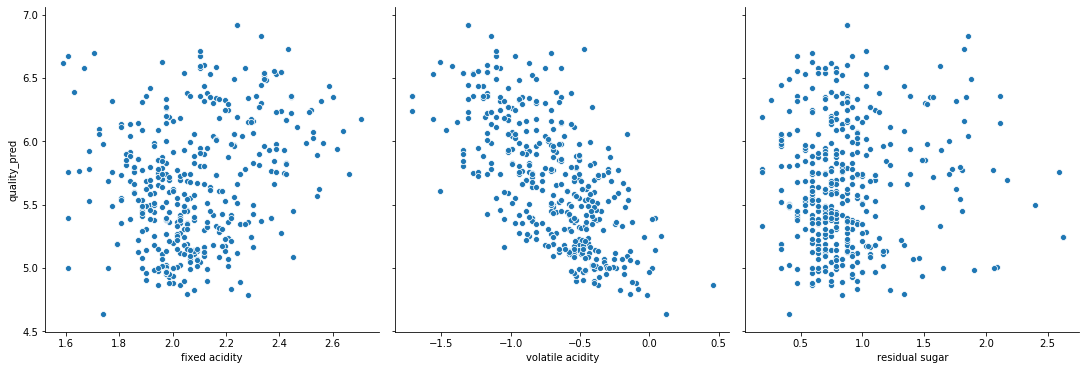

In [76]:
sns.pairplot(samp, x_vars=new_cols[:3], y_vars='quality_pred', height=5)
plt.show()

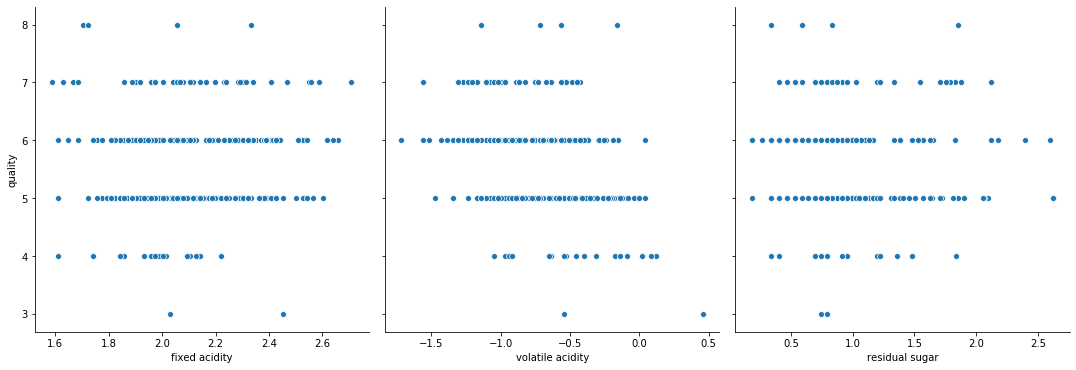

In [77]:
sns.pairplot(samp, x_vars=new_cols[:3], y_vars='quality', height=5)
plt.show()

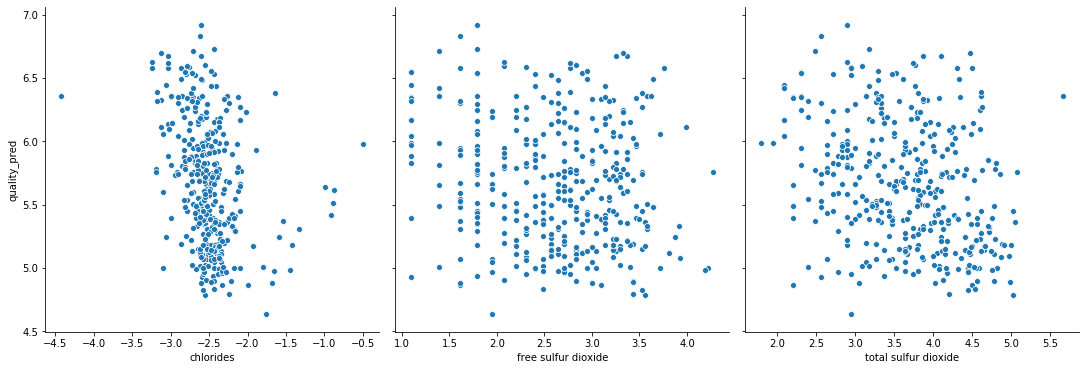

In [78]:
sns.pairplot(samp, x_vars=new_cols[3:6], y_vars='quality_pred', height=5)
plt.show()

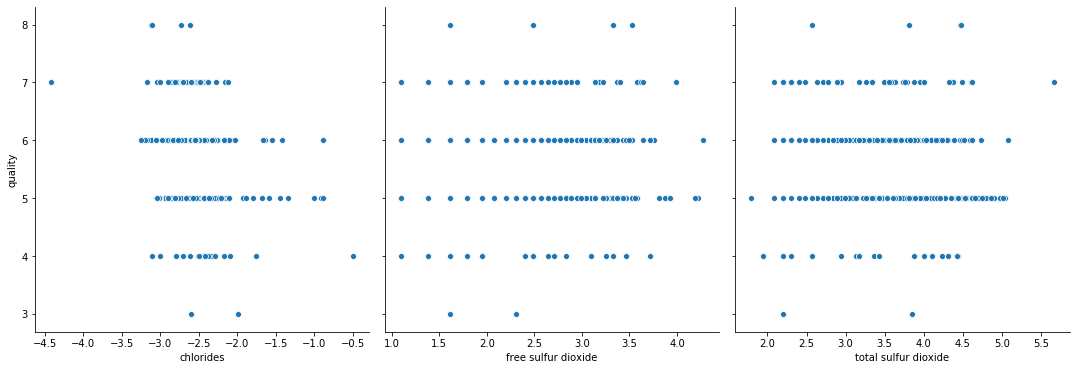

In [79]:
sns.pairplot(samp, x_vars=new_cols[3:6], y_vars='quality', height=5)
plt.show()

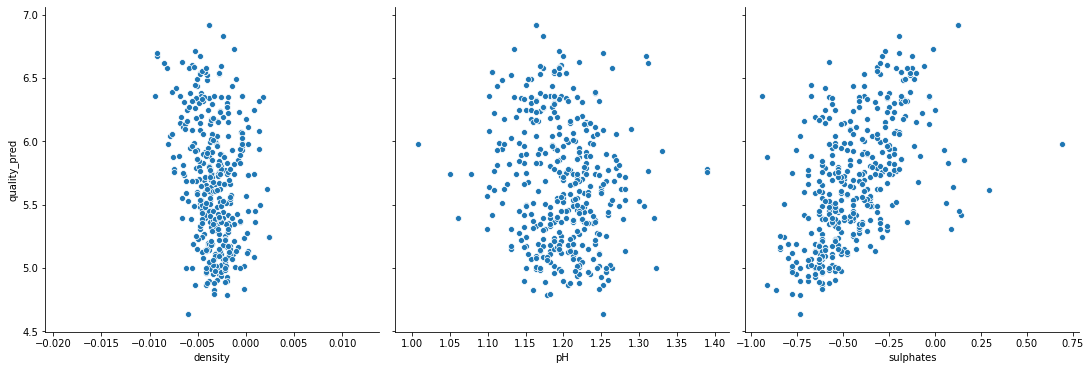

In [80]:
sns.pairplot(samp, x_vars=new_cols[6:9], y_vars='quality_pred', height=5)
plt.show()

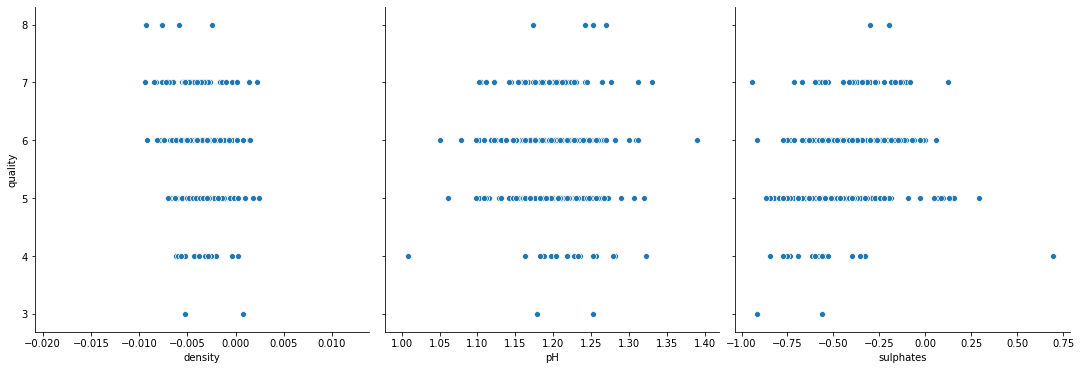

In [81]:
sns.pairplot(samp, x_vars=new_cols[6:9], y_vars='quality', height=5)
plt.show()

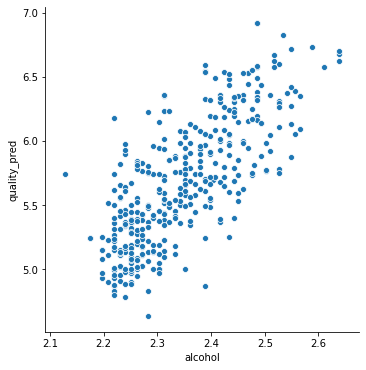

In [82]:
sns.pairplot(samp, x_vars=new_cols[9:], y_vars='quality_pred', height=5)
plt.show()

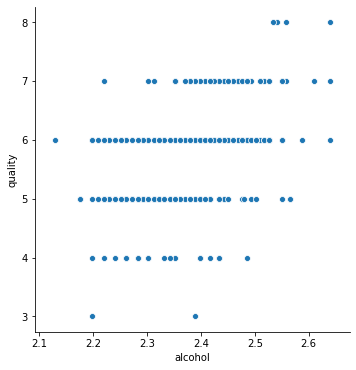

In [83]:
sns.pairplot(samp, x_vars=new_cols[9:], y_vars='quality', height=5)
plt.show()

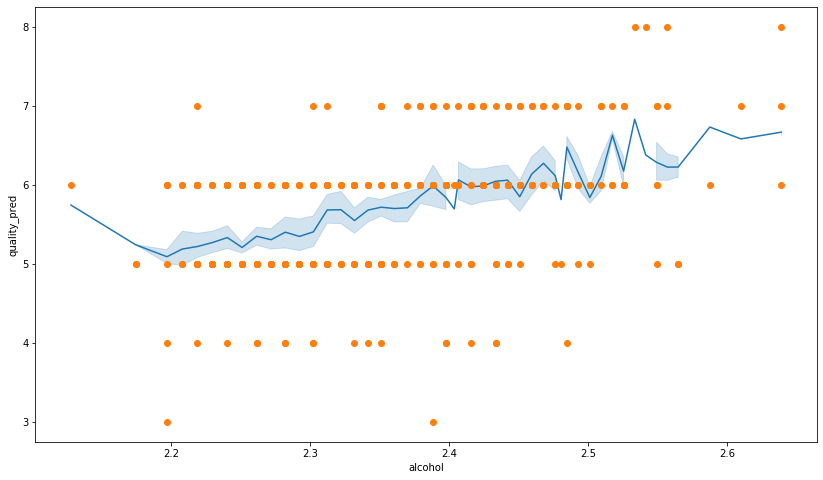

In [84]:
x = samp['alcohol']

plt.figure(figsize=(14,8))
sns.lineplot(x, samp['quality_pred'])
plt.plot(x, samp['quality'], 'o')
plt.show()

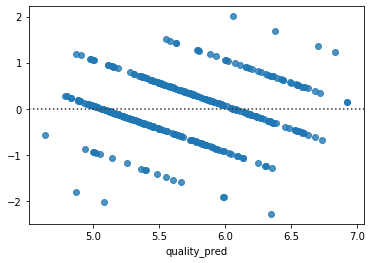

In [85]:
col = list(samp.columns)
i=11

sns.residplot(samp[col[i]], samp['quality']-samp['quality_pred'])
# pd.concat([samp['quality']-samp['quality_pred'],samp['quality_pred']], axis=1)